In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import seaborn as sns


In [60]:
#Origen del csv url: http://datos.jus.gob.ar/dataset/registro-sistematizacion-y-seguimiento-de-femicidios-y-homicidios-agravados-por-el-genero/archivo/583cec9a-3022-4234-8b32-17692a267aac
# Cargar el dataset
df = pd.read_csv("registro-de-femicidios-20200109.csv ")

In [4]:
#Mostrar las primeras 5 columnas del DataFrame
print(df.head())

   caso_numero  victima_edad victima_identidad_genero victima_tipo  \
0          310          47.0                    MUJER    PRINCIPAL   
1          402           7.0                   HOMBRE    VINCULADO   
2          237          18.0                    MUJER    PRINCIPAL   
3          565          46.0                    MUJER    PRINCIPAL   
4          594          27.0                    MUJER    PRINCIPAL   

  hecho_provincia hecho_modalidad_comisiva hecho_fecha         fuente_tipo  \
0       Río Negro                   GOLPES  2014-11-20  MEDIO COMUNICACIÓN   
1         Córdoba          ACUCHILLAMIENTO  2015-08-04  MEDIO COMUNICACIÓN   
2        Santa Fe          DISPARO DE BALA  2014-11-02  MEDIO COMUNICACIÓN   
3             NaN               QUEMADURAS  2016-01-22  MEDIO COMUNICACIÓN   
4         Neuquen          DISPARO DE BALA  2016-01-24  MEDIO COMUNICACIÓN   

                                         fuente_link  hecho_provincia_id  
0  http://www.diariouno.com.ar/poli

In [6]:
#Eliminacion de columnas - Creacion de un nuevo DataFrame
df2 = df.drop(["caso_numero", "fuente_tipo", "fuente_link", "hecho_provincia_id"], axis = 1)
df2

,victima_edad,victima_identidad_genero,victima_tipo,hecho_provincia,hecho_modalidad_comisiva,hecho_fecha
0,47.0,MUJER,PRINCIPAL,Río Negro,GOLPES,2014-11-20
1,7.0,HOMBRE,VINCULADO,Córdoba,ACUCHILLAMIENTO,2015-08-04
2,18.0,MUJER,PRINCIPAL,Santa Fe,DISPARO DE BALA,2014-11-02
3,46.0,MUJER,PRINCIPAL,NaN,QUEMADURAS,2016-01-22
4,27.0,MUJER,PRINCIPAL,Neuquen,DISPARO DE BALA,2016-01-24
...,...,...,...,...,...,...
1320,44.0,MUJER,PRINCIPAL,Mendoza,DISPARO DE BALA,2019-03-14
1321,54.0,MUJER,PRINCIPAL,Buenos Aires,OTROS,2019-03-17
1322,37.0,MUJER,PRINCIPAL,Ciudad Autónoma de Bs.As.,DESCUARTIZAMIENTO,2019-03-17
1323,59.0,MUJER,PRINCIPAL,Buenos Aires,APUÑALAMIENTO,2019-03-16


In [7]:
#Estructura del DataFrame - Columnas y Filas.
df2.shape

(1325, 6)

In [8]:
#Cantidad de Registros por columna.
df2.count()

victima_edad                1264
victima_identidad_genero    1259
victima_tipo                1325
hecho_provincia             1267
hecho_modalidad_comisiva    1200
hecho_fecha                 1289
dtype: int64

In [9]:
# Analisis Nulos
df2.isnull().sum()

victima_edad                 61
victima_identidad_genero     66
victima_tipo                  0
hecho_provincia              58
hecho_modalidad_comisiva    125
hecho_fecha                  36
dtype: int64

In [10]:
#Tipos de datos por columna
df2.dtypes

victima_edad                float64
victima_identidad_genero     object
victima_tipo                 object
hecho_provincia              object
hecho_modalidad_comisiva     object
hecho_fecha                  object
dtype: object

In [13]:
#Cambio de tipo de dato
df2["hecho_fecha"] = pd.to_datetime(df2["hecho_fecha"])


In [15]:
#Analisis columna victima_edad 
print(max(df2.victima_edad))

999.0


In [16]:
#Encontrar las filas con valores extremos
df_ordenado = df2.sort_values(by="victima_edad", ascending=False)
print(df_ordenado)



      victima_edad victima_identidad_genero victima_tipo hecho_provincia  \
930          999.0                    MUJER    PRINCIPAL         Tucumán   
1019         999.0                    MUJER    PRINCIPAL             NaN   
350           99.0                    MUJER    PRINCIPAL           Chaco   
1227          90.0                    MUJER    PRINCIPAL         Córdoba   
740           90.0                    MUJER    VINCULADO             NaN   
...            ...                      ...          ...             ...   
1157           NaN              TRANSGENERO    PRINCIPAL    Buenos Aires   
1216           NaN                    MUJER    PRINCIPAL           Salta   
1282           NaN              TRANSGENERO    PRINCIPAL           Salta   
1292           NaN              TRANSGENERO    PRINCIPAL    Buenos Aires   
1298           NaN              TRANSGENERO    PRINCIPAL         Tucumán   

     hecho_modalidad_comisiva hecho_fecha  
930                    GOLPES  2014-06-22  

In [19]:
#Eliminar filas
df2.drop([930, 1019], axis=0)

,victima_edad,victima_identidad_genero,victima_tipo,hecho_provincia,hecho_modalidad_comisiva,hecho_fecha
0,47.0,MUJER,PRINCIPAL,Río Negro,GOLPES,2014-11-20
1,7.0,HOMBRE,VINCULADO,Córdoba,ACUCHILLAMIENTO,2015-08-04
2,18.0,MUJER,PRINCIPAL,Santa Fe,DISPARO DE BALA,2014-11-02
3,46.0,MUJER,PRINCIPAL,NaN,QUEMADURAS,2016-01-22
4,27.0,MUJER,PRINCIPAL,Neuquen,DISPARO DE BALA,2016-01-24
...,...,...,...,...,...,...
1320,44.0,MUJER,PRINCIPAL,Mendoza,DISPARO DE BALA,2019-03-14
1321,54.0,MUJER,PRINCIPAL,Buenos Aires,OTROS,2019-03-17
1322,37.0,MUJER,PRINCIPAL,Ciudad Autónoma de Bs.As.,DESCUARTIZAMIENTO,2019-03-17
1323,59.0,MUJER,PRINCIPAL,Buenos Aires,APUÑALAMIENTO,2019-03-16


In [58]:
#Descarga csv limpio para su uso externo
df2.to_csv("Data_Femicidios.csv")

In [21]:
# Analisis estadistico - Moda
moda = df2["victima_edad"].mode()
moda

0    23.0
1    25.0
dtype: float64

Grafica por Provincia

In [22]:
#Conteo de casos por Provincia
conteo = df2["hecho_provincia"].value_counts()
conteo

Buenos Aires                 402
Córdoba                      133
Santa Fe                      92
Salta                         67
Mendoza                       63
Santiago del Estero           58
Entre Ríos                    56
Misiones                      52
Chaco                         51
Ciudad Autónoma de Bs.As.     45
Tucumán                       38
Corrientes                    37
Jujuy                         28
Chubut                        24
Neuquen                       22
Río Negro                     21
Catamarca                     16
Formosa                       15
San Juan                      12
San Luis                      11
Santa Cruz                     7
La Pampa                       7
La Rioja                       6
Tierra del Fuego               4
Name: hecho_provincia, dtype: int64

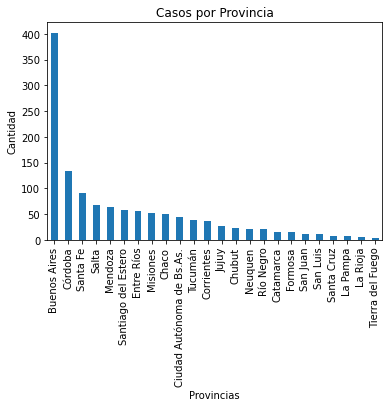

In [23]:
#Empezar a graficarlo.
conteo.plot(kind="bar")

#Configurar ejes y titulo.
plt.xlabel("Provincias")
plt.ylabel("Cantidad")
plt.title("Casos por Provincia")

#Mostrar Grafico.
plt.show()

Grafica Modalidad Comisiva.

In [24]:
# Conteo de la modalidad comisiva
hechos = df2["hecho_modalidad_comisiva"].value_counts()
hechos

DISPARO DE BALA      310
ACUCHILLAMIENTO      270
GOLPES               214
ESTRANGULAMIENTO      77
QUEMADURAS            76
APUÑALAMIENTO         71
ASFIXIA               47
DEGOLLAMIENTO         31
OTROS                 29
AHORCAMIENTO          24
ABUSO SEXUAL          21
DESCUARTIZAMIENTO     13
ATROPELLAMIENTO        5
ENVENENAMIENTO         4
AHOGAMIENTO            3
DESBARRANCAMIENTO      2
Empalamiento           2
SUICIDIO INDUCIDO      1
Name: hecho_modalidad_comisiva, dtype: int64

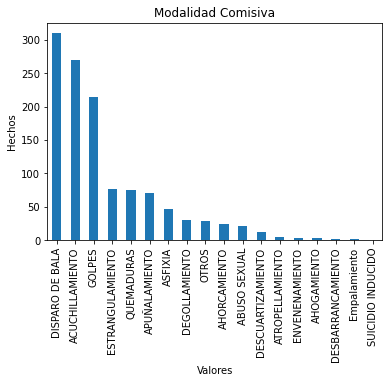

In [25]:
#Empezar a graficarlo
hechos.plot(kind='bar')

# Configurar los ejes y título
plt.xlabel('Valores')
plt.ylabel('Hechos')
plt.title('Modalidad Comisiva')

# Mostrar el gráfico
plt.show()

Grafica Genero de las Victimas.

In [26]:
# Analisis Genero de las victimas
genero = df2["victima_identidad_genero"].value_counts()
genero

MUJER          1173
HOMBRE           49
TRANSGENERO      37
Name: victima_identidad_genero, dtype: int64

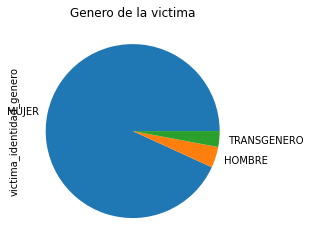

In [27]:
#Empezar a graficarlo
genero.plot(kind='pie', )

# Configurar los ejes y título

plt.title('Genero de la victima')

# Mostrar el gráfico
plt.show()

Analisis Años

In [57]:
#Crear Variable para analisis
anio_hecho = pd.to_datetime(df2["hecho_fecha"]).dt.to_period("Y")

#Analisis año max que se registro
print(anio_hecho.max())

#Analisis año min que se registro
print(anio_hecho.min())

#Analisis Moda
print(anio_hecho.value_counts())

2019
2008
2017    274
2016    234
2015    203
2014    185
2013    154
2018    153
2019     77
2012      7
2008      1
2009      1
Freq: A-DEC, Name: hecho_fecha, dtype: int64
